<a href="https://colab.research.google.com/github/tanaymukherjee/PB_Challenge_2021/blob/main/PB_Challenge_2021_Team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pitney Bowes Challenge

### Team Members:

**Team 2**
1. Amulya Singh
2. Chau Hoang
3. Shani Batat
4. Tanay Mukherjee

### Part A: Loading all packages and libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install <name of any package that's not loaded already in your system>

In [3]:
# Dabl package is not loaded on Colab by default so putting that for reference as an example
!pip install dabl

In [4]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Standard operating libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# For EDA
import dabl

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# Machine learning 
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classification metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, accuracy_score

### Part B: Loading file from dropbox

In [5]:
# Google Colaboratory with dropbox
# Load the training set
# We need to run it only once
!wget -O train.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0

--2021-04-27 22:04:28--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv [following]
--2021-04-27 22:04:28--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfe1da0f65416b8fd0a2685d4b0.dl.dropboxusercontent.com/cd/0/inline/BNd3X31iXBuEJUXby9QuVdIagMW1GEwMyelnGO2R64LC6yYltQ1x7QU_a4qUlOMN6Ur60A5KK6ABQ549aoW33wWbANsxy93dC_FBuw3d_yN-_bUupL_qwdbx7vLkhuG7d1t5o-jHA30sO4Y7M7IVFf3u/file# [following]
--2021-04-27 22:04:29--  https://ucfe1da0f65416b8fd0a2685d4b0.dl.dropboxusercontent.com/cd/0/inline/BNd3X31iXBuEJ

In [6]:
# Google Colaboratory with dropbox
# Read the test set
# We need to run it only once
!wget -O test.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0

--2021-04-27 22:04:30--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv [following]
--2021-04-27 22:04:30--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d6bd98bec28aa8f4f9c5e1d23.dl.dropboxusercontent.com/cd/0/inline/BNe_f_hqPZmEokyf1VXkosREDjEG_mu9QxddQjedE5bZ5VCgVmiydG56hhFmVhvw89TOxIkxWvy468ptjssMJh0jDomYXcZ3W9KmpUg5UOMmP6EQoIRFGwUdLbeZLTKS9x3edpngUMp68wW_4KBVrvxx/file# [following]
--2021-04-27 22:04:30--  https://uc7d6bd98bec28aa8f4f9c5e1d23.dl.dropboxusercontent.com/cd/0/inline/BNe_f_hqPZmEokyf

### Part C: Data Pre-processing

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, lacking in certain behaviors or trends, and is likely to contain many errors.

Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.

In [7]:
# Check the path of the files
!ls -ahl "/content"

total 18M
drwxr-xr-x 1 root root 4.0K Apr 27 19:25 .
drwxr-xr-x 1 root root 4.0K Apr 27 18:18 ..
drwxr-xr-x 4 root root 4.0K Apr 21 13:38 .config
-rw-r--r-- 1 root root  35K Apr 27 19:25 pb_challenge_prediction_xgb.csv
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data
-rw-r--r-- 1 root root 1.8M Apr 27 22:04 test.csv
-rw-r--r-- 1 root root  16M Apr 27 22:04 train.csv


In [8]:
# Read the training dataset
df = pd.read_csv("/content/train.csv")

In [9]:
# Read the test dataset
df_test = pd.read_csv('/content/test.csv')

In [10]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [11]:
# Moving out classification/prediction feature at the beginning
col_name="fail_7"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

In [12]:
# To print top 10 records from the file
df.head(10)

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,0,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,0,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,0,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,0,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
5,0,30054,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,4.36,-0.023333,0.040000,False,4.35,4.21,47.38,88.32,4.60,4.54,4.94,4.65,37.91,76.00,5.93,4.46,5.09,5.03,5.48,4.18,4.64,4.19,4.98,3.36,-0.360000,-0.143333,0.573333,0.800000,0.396667,0.036667,0.326667,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,4/1/2021,10/5/2019
6,0,26431,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,3.74,-0.350000,-0.010000,False,4.76,3.46,5.63,4.29,6.21,5.14,24.89,49.26,5.31,5.37,25.47,43.57,25.92,40.73,37.76,57.95,20.04,35.44,4.42,4.19,-0.026667,-0.446667,4.236667,-0.010000,0.020000,0.016667,5.963333,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,4/1/2021,9/13/

In [13]:
# Records - rows and columns
df.shape

(40500, 55)

In [14]:
# Summarize the data for each feature
df.describe(include='all')

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500,40500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,164
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2021,9/20/2019
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40500,877
mean,0.232123,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,NaN,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,NaN,NaN
std,0.422193,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,NaN,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,NaN,NaN
min,0.000000,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,NaN,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-

In [15]:
# Correlation table
df.corr(method='pearson')

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
fail_7,1.000000,-0.004251,-0.014580,-0.003520,-0.001927,0.006221,0.025426,-0.004830,-0.015220,-0.003632,-0.003412,0.004703,0.041993,-0.006090,0.289355,-0.000002,0.000938,0.006677,0.006861,-0.001499,-0.001256,0.000131,0.000703,-0.001254,-0.000639,0.001957,0.002584,0.000548,0.001303,0.005701,0.006292,-0.011284,-0.011028,0.003820,0.004209,0.010832,0.003984,0.002179,0.004027,-0.001544,0.006105,0.003671,0.058489,0.058476,0.009120,0.022928,0.124680,0.123395,-0.059695,-0.057078,0.105511,0.007645,-0.058233
deviceid,-0.004251,1.000000,0.004142,-0.001142,0.002691,0.003504,-0.004674,-0.001521,0.004854,-0.000761,0.002166,0.004750,-0.007265,0.002634,0.000475,-0.004359,-0.002377,-0.004506,-0.004438,-0.000596,-0.001011,0.001588,0.000365,0.002816,0.004019,-0.003043,-0.002586,-0.004631,-0.002813,0.005479,0.004108,-0.005070,-0.004088,0.000988,-0.001249,0.007709,0.002769,-0.004402,-0.007273,-0.000034,0.003283,-0.002331,0.000911,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033
avg_time_charging_lag1,-0.014580,0.004142,1.000000,0.001707,0.001525,-0.005240,0.011670,-0.003474,0.979988,0.001834,0.001580,-0.005232,0.009126,-0.001647,-0.004235,0.000620,0.001160,-0.005266,-0.005822,-0.006620,-0.006738,-0.001907,-0.001947,-0.000118,-0.001578,0.002459,0.002842,-0.002732,-0.003305,-0.005181,-0.004096,-0.006153,-0.004673,0.008429,0.008271,-0.051579,-0.001434,-0.002997,0.002863,0.057934,-0.006162,0.000509,-0.192945,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768
avg_time_charging_lag2,-0.003520,-0.001142,0.001707,1.000000,-0.010682,-0.000641,-0.000856,-0.000638,0.001050,0.980808,-0.009903,0.000053,0.000430,-0.004200,0.002940,-0.004350,-0.004710,0.004742,0.002958,-0.000284,-0.000026,-0.000321,-0.001353,0.002342,0.005049,0.003042,0.002544,0.003173,0.003806,0.003829,0.002761,-0.007410,-0.007403,-0.003745,-0.005440,0.002864,-0.020310,-0.004661,0.004020,-0.002653,0.057512,0.006660,-0.193247,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353
avg_time_charging_lag3,-0.001927,0.002691,0.001525,-0.010682,1.000000,-0.005379,-0.001756,-0.002851,0.001107,-0.012405,0.981309,-0.005899,-0.004590,-0.000372,-0.002643,0.000967,0.001910,0.002626,0.003138,-0.006502,-0.005704,0.002673,0.003952,0.006199,0.006418,-0.004176,-0.004275,0.004701,0.004396,-0.003477,-0.002539,0.001963,0.003229,-0.003530,-0.003750,0.004181,-0.002073,-0.010424,0.006534,0.004819,0.000220,0.044430,-0.199668,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052
avg_time_charging_lag7,0.006221,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.004053,-0.000357,-0.006494,0.001475,-0.004824,0.981128,-0.012199,0.004841,0.004366,-0.001249,-0.001071,-0.001183,-0.001334,0.010348,0.008811,0.003174,0.

### Part D: Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In [16]:
# Converting the object typ for date fields to datetime
df['LastRecord'] = pd.to_datetime(df['LastRecord'])
df_test['LastRecord'] = pd.to_datetime(df_test['LastRecord'])
df['Date Deployed'] = pd.to_datetime(df['Date Deployed'])
df_test['Date Deployed'] = pd.to_datetime(df_test['Date Deployed'])

In [17]:
# Since the dates themsleves will not help us with any prediction, we want to calculate the days between the deployment and the last recorded instance
# We do this for both training and testing dataset
df['days_since_dep'] = (df['LastRecord'] - df['Date Deployed']).dt.days
df_test['days_since_dep'] = (df_test['LastRecord'] - df_test['Date Deployed']).dt.days

# Since the new variable - "days_since_dep" will be highly co-related with last record and date deployed we can remove them as columns.

In [18]:
# Dropping the features which are of object type (dates) but have no use in the feature selection or modeling
# This is because the new variable - "days_since_dep" will be highly co-related with last record and date deployed we can remove them as columns.
del df['LastRecord']
del df['Date Deployed']
del df_test['LastRecord']
del df_test['Date Deployed']

In [19]:
# Check for total null values
df.isnull().values.sum()

33713

In [20]:
# Null or NAs by column
naColumns = df.isnull().sum()

# Sort features in ascending order with no. of NAs
naColumns.sort_values()

fail_7                            0
piececount                        0
max_voltage_day                   0
avg_time_discharging              0
avg_time_charging                 0
avg_volt_change_discharging       0
avg_volt_change_charging          0
number_times_restart              0
total_off_time                    0
dischargecycles                   0
chargecycles                      0
charging_rate_lag5                0
charging_rate_lag4                0
discharging_rate_lag5             0
discharging_rate_lag4             0
cycle_time                        0
days_since_dep                    0
charge_cycle_time_below_12        0
deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
charging_rate_lag3                0
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_charging_lag4            0
discharging_rate_lag3       

Text(0.5, 0, 'Top 20 features with missing values')

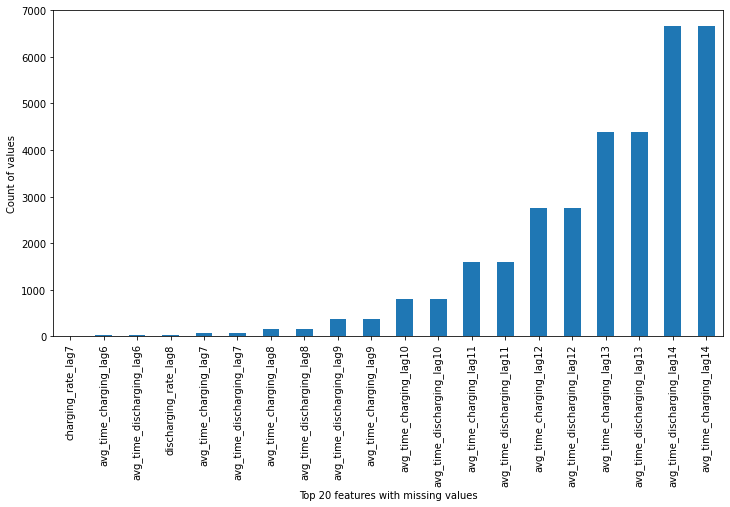

In [21]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 features with missing values')

In [22]:
# Fill the missing NAs for rows now
def filling(df):
    for i in df:
        if df[i].dtypes == object:
            # The non-numerical ones to be replaced by the most common occurences
            fill = df[i].mode().iat[0]
            df.loc[:,i] = df[i].replace(np.nan,fill)
        else:
            # The numeric ones will be replaces by median values for the fature
            the_mean = df[i].median(skipna=True)
            df.loc[:,i] = df[i].replace(np.nan,the_mean)

filling(df)

In [23]:
# Check - should show no more NAs
df.isnull().values.sum()

0

### Part E: Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [24]:
# Checking for feature type
types = dabl.detect_types(df)
print(types)

                             continuous  dirty_float  ...  free_string  useless
fail_7                            False        False  ...        False    False
deviceid                           True        False  ...        False    False
avg_time_charging_lag1             True        False  ...        False    False
avg_time_charging_lag2             True        False  ...        False    False
avg_time_charging_lag3             True        False  ...        False    False
avg_time_charging_lag7             True        False  ...        False    False
charging_rate_lag3                 True        False  ...        False    False
charging_rate_lag7                 True        False  ...        False    False
avg_time_discharging_lag1          True        False  ...        False    False
avg_time_discharging_lag2          True        False  ...        False    False
avg_time_discharging_lag3          True        False  ...        False    False
avg_time_discharging_lag7          True 

Target looks like classification
Showing only top 10 of 52 continuous features
Linear Discriminant Analysis training set score: 0.502


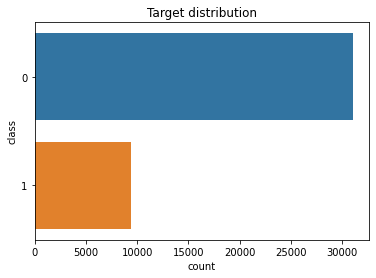

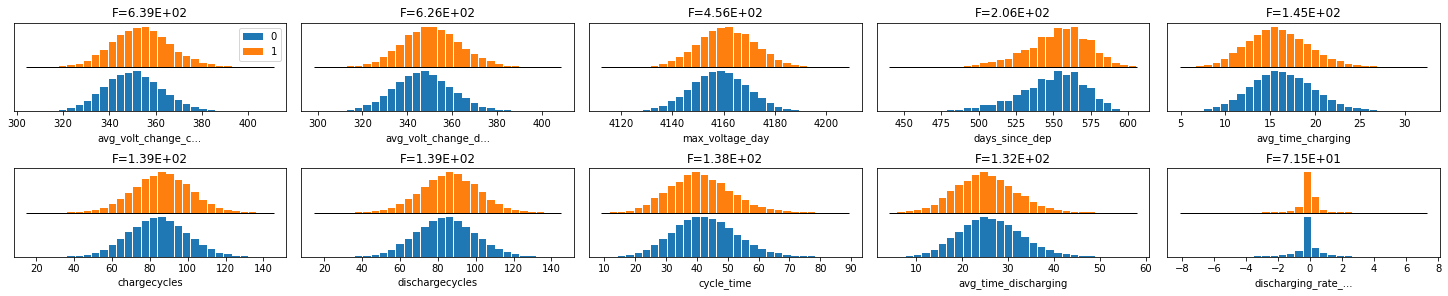

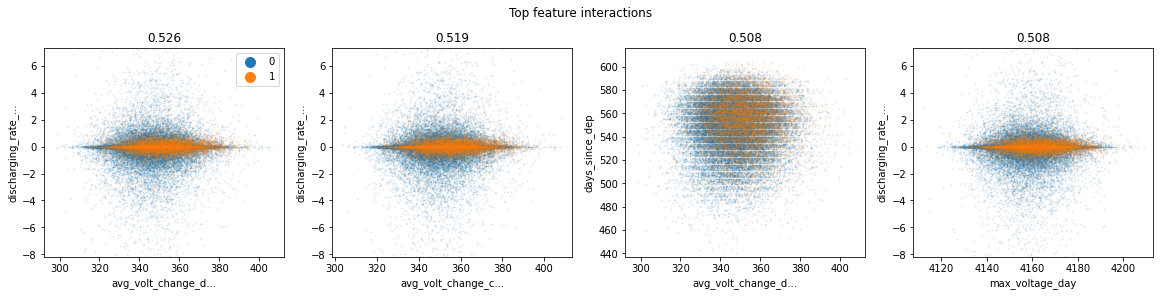

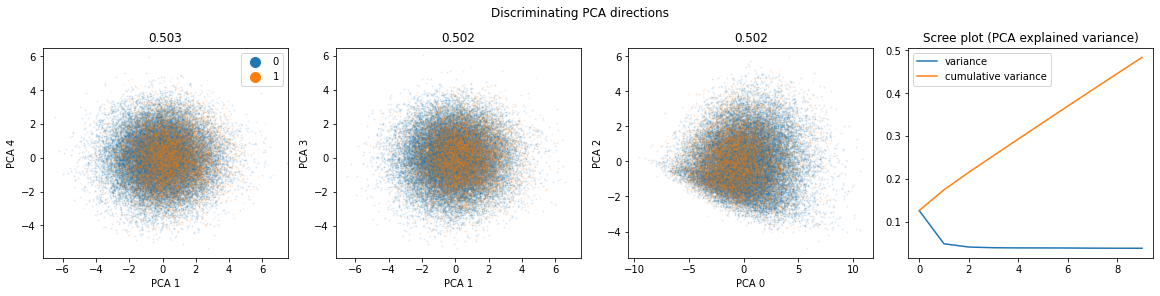

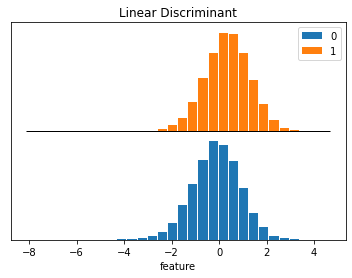

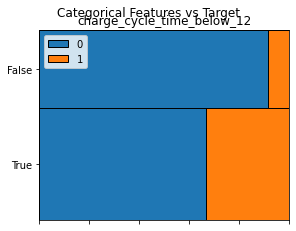

In [25]:
# What do we have for our y variable - 'fail_7'
# Dabl is an intuitive package that tells us if the task is a classification or regression
dabl.plot(df, target_col="fail_7")

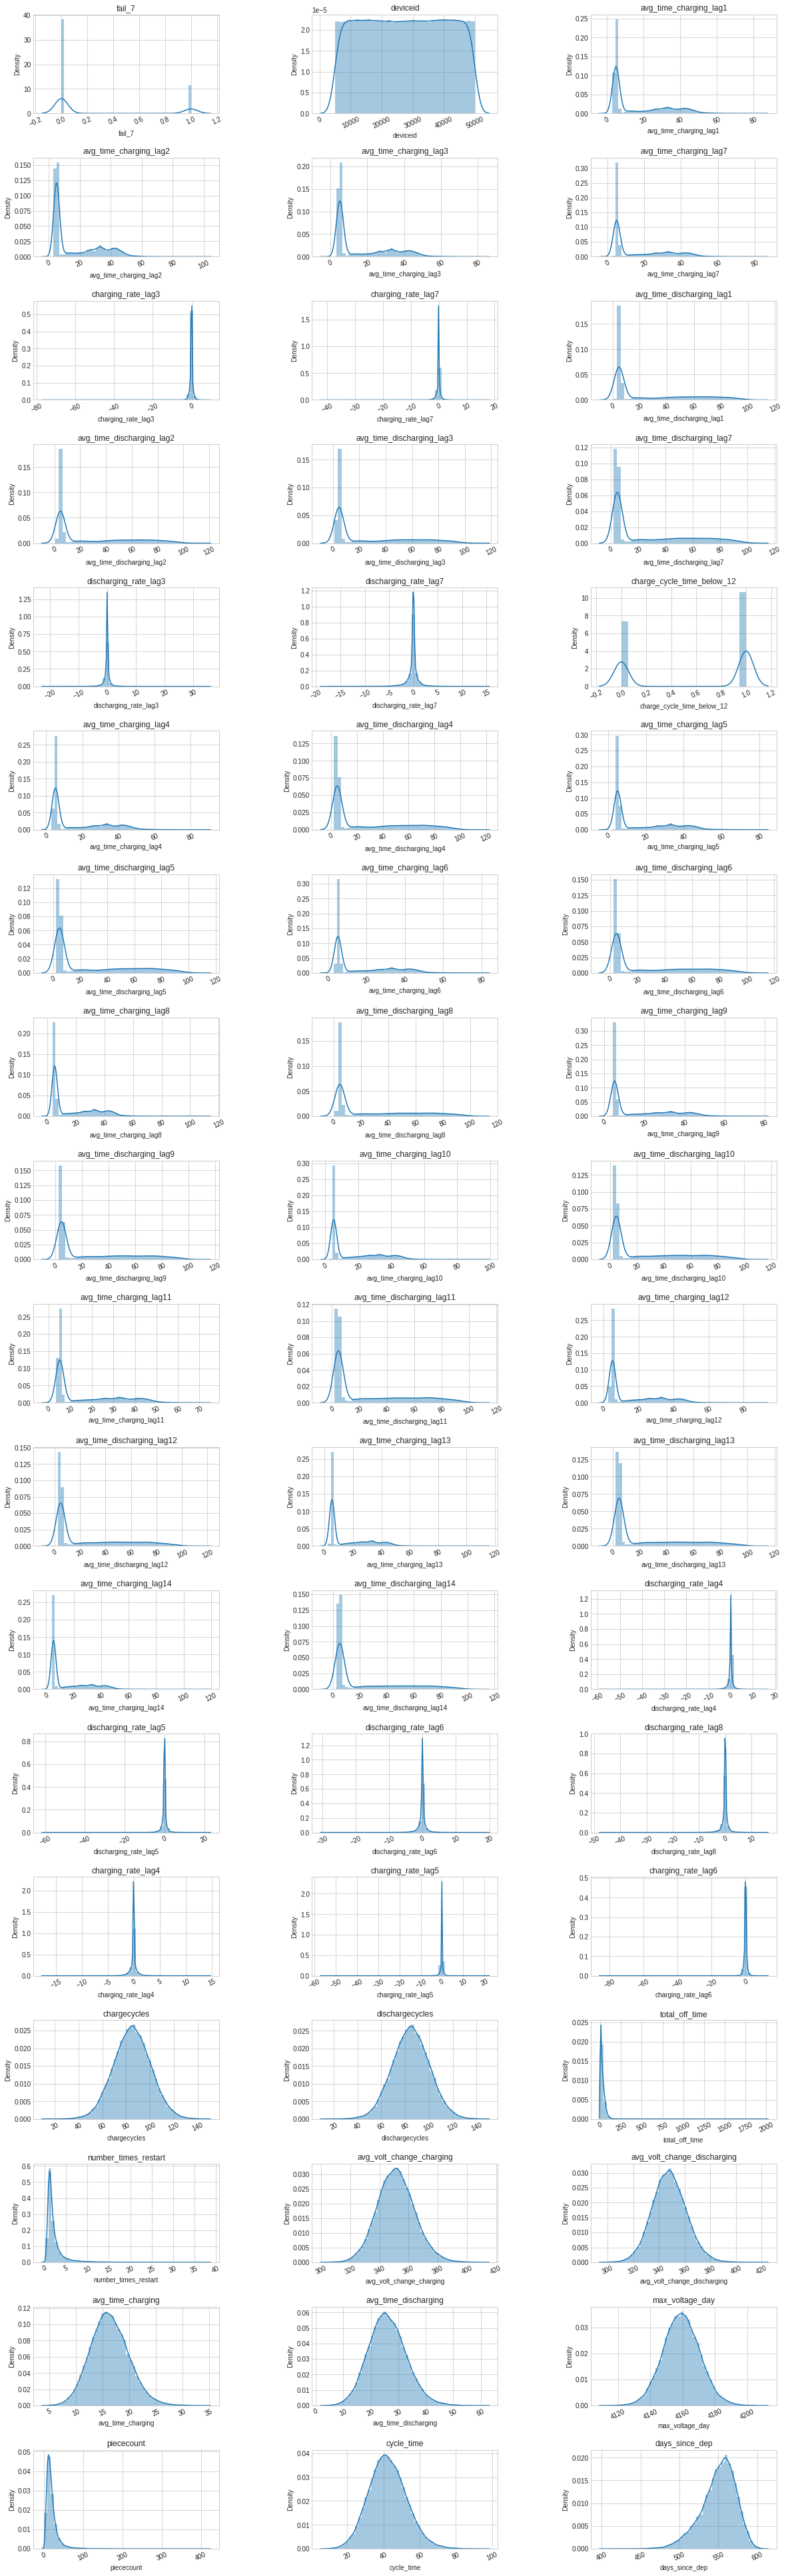

In [26]:
# Plotting the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=70, hspace=0.45, wspace=0.5)

### Part F: Feature Extraction

Feature extraction involves reducing the number of resources required to describe a large set of data. When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause a classification algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy.

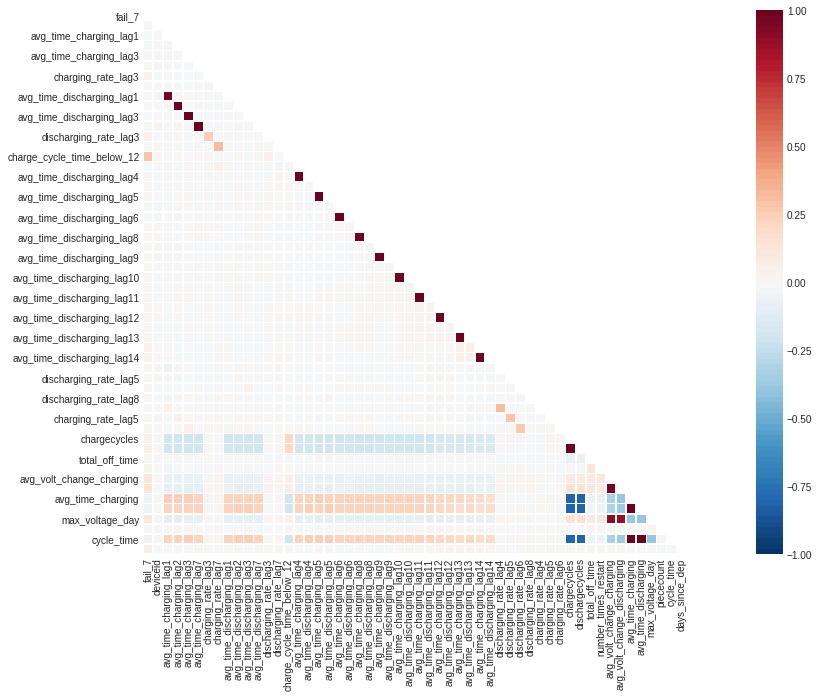

In [27]:
# Creating a correlation plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

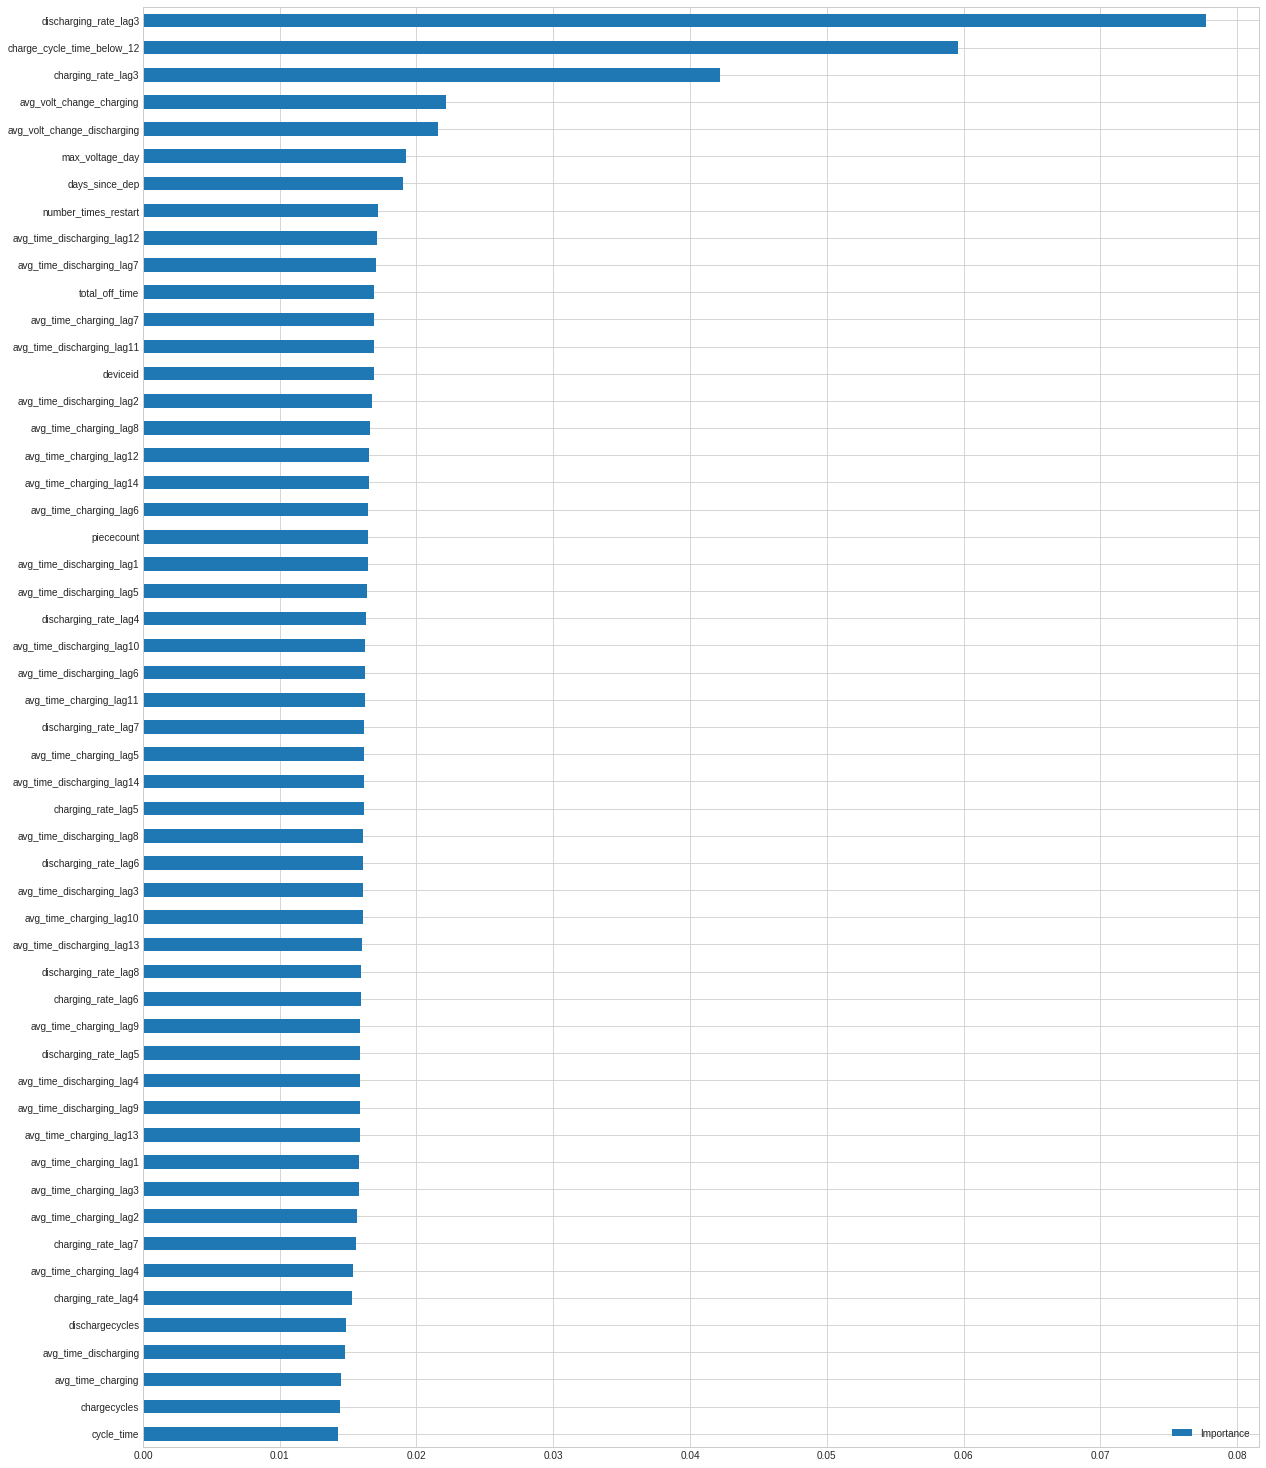

In [28]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

**PCA:**

Principal Component Analysis (PCA) involves the process by which principal components are computed, and their role in understanding the data. PCA is an unsupervised approach, which means that it is performed on a set of variables 
X
1
, 
X
2
, …, 
X
p
 with no associated response 
Y
. PCA reduces the dimensionality of the data set, allowing most of the variability to be explained using fewer variables. PCA is commonly used as one step in a series of analyses. You can use PCA to reduce the number of variables and avoid multicollinearity, or when you have too many predictors relative to the number of observations.

<BarContainer object of 53 artists>

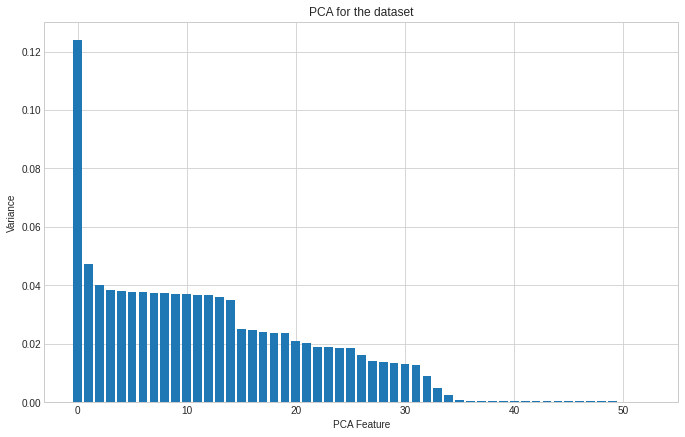

In [29]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

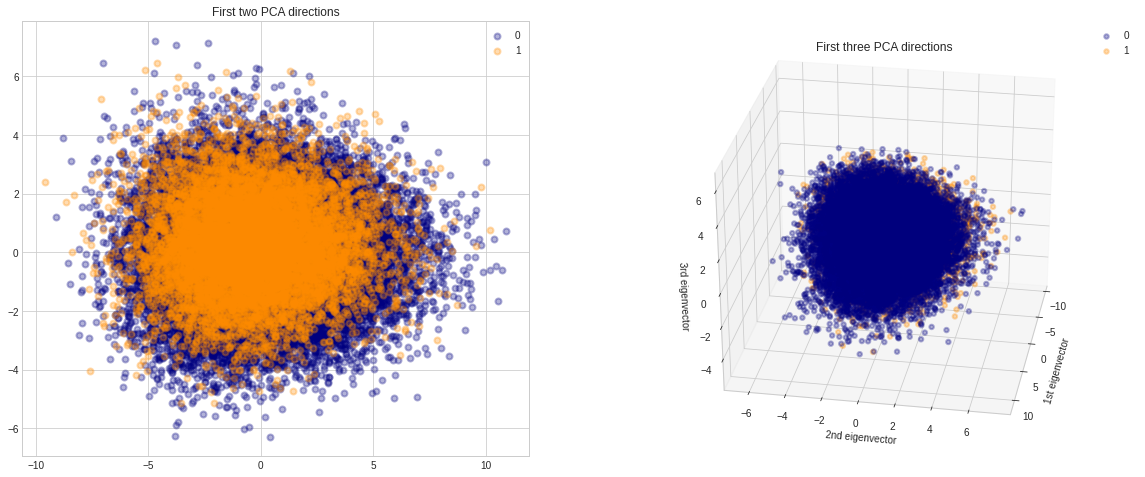

In [30]:
# PCA's components graphed in 2D and 3D

# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
y = df['fail_7']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Rotate the axes
ax.view_init(30, 10)

## CASE I - Modeling with all the features

### Part G: Machine Learning - Model Preparation

In [31]:
# Split a dataset into train and validation sets
# NOTE: We are not calling it test set because that is separately shared for prediction
X = df.drop ('fail_7', axis=1)
y = df['fail_7']

# Split into train and validation sets
# We are calling it test here but that's just for nomenclature purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 53) (36450,)
(4050, 53) (4050,)


In [33]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [34]:
# calculate the FPR and TPR for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [35]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          XGBClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [36]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 13.80 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.1598623219728096e-16, 'class_weight': None, 'C': 1.1708650717342773e-15}

Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 130.0802674395637, 'class_weight': None, 'C': 6.1983947033040265e-18}

Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1417474162926796.0, 'class_weight': None, 'C': 7.2641719969222785e-09}

Model with rank: 4
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 7.402645268726609e-07, 'class_weight': None, 'C': 281.9973482717323}

Model with rank: 5
Mean validation score: 0.767 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.1795250557810835e+17, 'class_weight': None, 'C': 171839702583.0137}



### Part H: Machine Learning - Model Execution

**Logistic Regression:**
This is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. In a binary logistic regression model, the dependent variable has two levels (categorical). The coefficients are estimated from the training data using maximum-likelihood estimation


In [37]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.84
Accuracy CV 10-Fold: 76.75
Running Time: 0:00:12.567914


In [38]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27985
           1       0.46      0.01      0.01      8465

    accuracy                           0.77     36450
   macro avg       0.61      0.50      0.44     36450
weighted avg       0.70      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.42      0.01      0.01       936

    accuracy                           0.77      4050
   macro avg       0.59      0.50      0.44      4050
weighted avg       0.69      0.77      0.67      4050



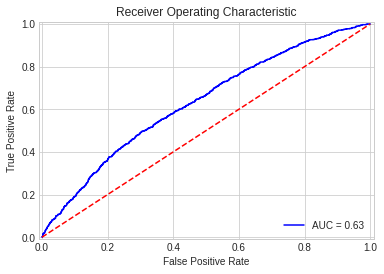

In [39]:
plot_roc_curve(y_test, probs_log)

**KNN:** K-nearest neighbors is a supervised machine learning algorithm that can be used to solve both classification and regression tasks. In this statistical model the value of a data point is determined by the data points around it. KNN classifier determines the class of a data point by majority voting principle. If k is set to 3, the classes of 3 closest points are checked. Prediction is done according to the majority class. Similarly, kNN regression takes the mean value of 3 closest points.


In [40]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 69.19
Accuracy CV 10-Fold: 70.04
Running Time: 0:01:06.513292


In [41]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27985
           1       0.24      0.13      0.17      8465

    accuracy                           0.70     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.65      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3114
           1       0.21      0.12      0.15       936

    accuracy                           0.69      4050
   macro avg       0.49      0.49      0.48      4050
weighted avg       0.64      0.69      0.66      4050



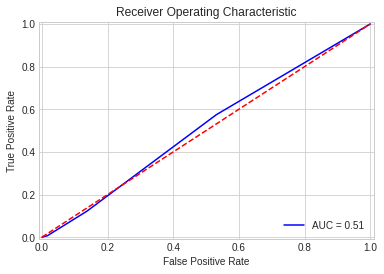

In [42]:
plot_roc_curve(y_test, probs_knn)

**Gaussian Naive Bayes:** This classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

P(A|B) = P(B|A) * P(A) / P(B)

Using Bayes theorem, we find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption here is that the predictors/features are independent, i.e.,  presence of one particular feature does not affect the other. 


In [43]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 62.2
Accuracy CV 10-Fold: 62.05
Running Time: 0:00:02.017418


In [44]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_gaussian))
print(metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.85      0.62      0.71     27985
           1       0.33      0.63      0.44      8465

    accuracy                           0.62     36450
   macro avg       0.59      0.62      0.58     36450
weighted avg       0.73      0.62      0.65     36450

              precision    recall  f1-score   support

           0       0.86      0.61      0.71      3114
           1       0.34      0.66      0.45       936

    accuracy                           0.62      4050
   macro avg       0.60      0.63      0.58      4050
weighted avg       0.74      0.62      0.65      4050



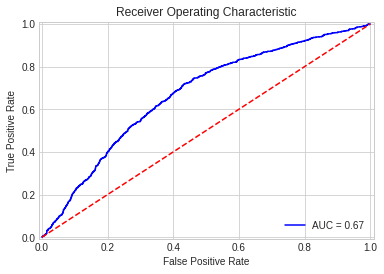

In [45]:
plot_roc_curve(y_test, probs_gau)

**Linear SVC:** Linear Support Vector Classifier a ML model used to fit the data we provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [46]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 76.89
Accuracy CV 10-Fold: 55.54
Running Time: 0:02:38.555448


In [47]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67     27985
           1       0.24      0.41      0.30      8465

    accuracy                           0.56     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.65      0.56      0.59     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



**Stochastic Gradient Descent:** It is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.**

In [48]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 76.89
Accuracy CV 10-Fold: 74.49
Running Time: 0:00:30.136207


In [49]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     27985
           1       0.30      0.07      0.12      8465

    accuracy                           0.74     36450
   macro avg       0.53      0.51      0.48     36450
weighted avg       0.66      0.74      0.68     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



**Decision Tree Classifier:** It is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter. For classification, a tree is built through a process known as binary recursive partitioning. This is an iterative process of splitting the data into partitions, and then splitting it up further on each of the branches.


In [50]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 72.22
Accuracy CV 10-Fold: 71.32
Running Time: 0:00:34.673622


In [51]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_dt))
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     27985
           1       0.39      0.41      0.40      8465

    accuracy                           0.71     36450
   macro avg       0.60      0.61      0.60     36450
weighted avg       0.72      0.71      0.72     36450

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3114
           1       0.41      0.43      0.42       936

    accuracy                           0.72      4050
   macro avg       0.62      0.62      0.62      4050
weighted avg       0.73      0.72      0.73      4050



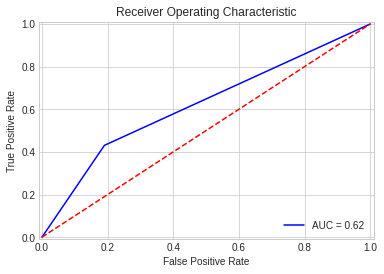

In [52]:
plot_roc_curve(y_test, probs_dt)

In [53]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 116.12 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.798 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 18}

Model with rank: 2
Mean validation score: 0.790 (std: 0.006)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.789 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 12}

Model with rank: 4
Mean validation score: 0.789 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 8}

Model with rank: 5
Mean validation score: 0.782 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini

**Random Forest Classifier:** Decision trees we learnt above is the base for this statistical model. It consists of a large number of individual decision trees that operate as an ensemble. The principle behind this model is - “a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models”.

In [54]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 79.68
Accuracy CV 10-Fold: 78.76
Running Time: 0:00:28.278270


In [55]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     27985
           1       0.60      0.26      0.37      8465

    accuracy                           0.79     36450
   macro avg       0.70      0.61      0.62     36450
weighted avg       0.76      0.79      0.75     36450

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3114
           1       0.65      0.27      0.38       936

    accuracy                           0.80      4050
   macro avg       0.73      0.61      0.63      4050
weighted avg       0.77      0.80      0.76      4050



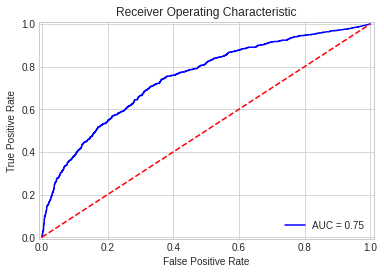

In [56]:
plot_roc_curve(y_test, probs_rf)

**Gradient Boosting Classifier:** It represents a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Trees are added to the model over time and the existing trees' values aren't changed

In [57]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbc, test_pred_gbc, acc_gbc, acc_cv_gbc, probs_gbc = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbc)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc)
print("Running Time: %s" % datetime.timedelta(seconds=gbc_time))

Accuracy: 81.33
Accuracy CV 10-Fold: 81.34
Running Time: 0:06:53.024432


In [58]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_gbc))
print(metrics.classification_report(y_test, test_pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3114
           1       0.68      0.37      0.48       936

    accuracy                           0.81      4050
   macro avg       0.76      0.66      0.68      4050
weighted avg       0.80      0.81      0.79      4050



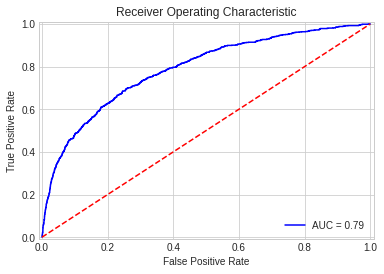

In [59]:
plot_roc_curve(y_test, probs_gbc)

**XGBoost Classifier:** It is one of the fastest implementations of gradient boosted trees discussed above. It does this by tackling one of the major inefficiencies of gradient boosted trees: considering the potential loss for all possible splits to create a new branch (especially if you consider the case where there are thousands of features, and therefore thousands of possible splits). XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits.

In [60]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb, test_pred_xgb, acc_xgb, acc_cv_xgb, probs_xgb = fit_ml_algo(XGBClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Accuracy: 81.11
Accuracy CV 10-Fold: 81.38
Running Time: 0:01:15.671449


In [61]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_xgb))
print(metrics.classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3114
           1       0.67      0.36      0.47       936

    accuracy                           0.81      4050
   macro avg       0.75      0.65      0.68      4050
weighted avg       0.79      0.81      0.79      4050



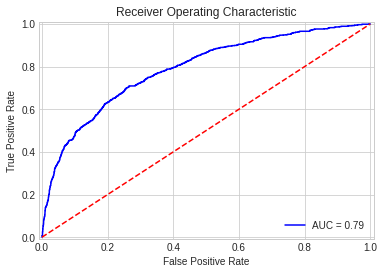

In [62]:
plot_roc_curve(y_test, probs_xgb)

**Often we are asked what is the difference between Gradient Boosting and XGBost?**

Basically, Gradient boosting is a technique. Both, the XGBoost classifier and sklearn's Gradient Boosting classifier are implementations of this technique in code. So they are implementing the same technique.

XGBoost is one of the fastest implementations of gradient boosted trees.
It does this by tackling one of the major inefficiencies of gradient boosted trees: considering the potential loss for all possible splits to create a new branch (especially if you consider the case where there are thousands of features, and therefore thousands of possible splits). XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits. In some cases they seem to not make any difference as we see here.

Although XGBoost implements a few regularization tricks, this speed up is by far the most useful feature of the library, allowing many hyperparameter settings to be investigated quickly. This is helpful because there are many, many hyperparameters to tune. Nearly all of them are designed to limit overfitting (no matter how simple your base models are, if you stick thousands of them together they will overfit).

### Part I: Machine Learning - Model Evaluation

In [63]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbc,
        acc_xgb
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
7,Gradient Boosting Classifier,81.33
8,XGBoost Classifier,81.11
2,Random Forest,79.68
4,Stochastic Gradient Descent,76.89
5,Linear SVC,76.89
1,Logistic Regression,76.84
6,Decision Tree,72.22
0,KNN,69.19
3,Naive Bayes,62.20


In [64]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbc,
        acc_cv_xgb
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
8,XGBoost Classifier,81.38
7,Gradient Boosting Classifier,81.34
2,Random Forest,78.76
1,Logistic Regression,76.75
4,Stochastic Gradient Descent,74.49
6,Decision Tree,71.32
0,KNN,70.04
3,Naive Bayes,62.05
5,Linear SVC,55.54


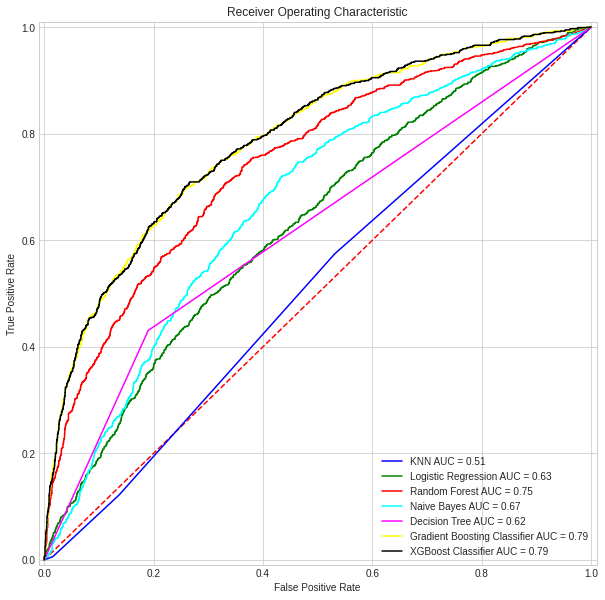

In [65]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier',
    'XGBoost Classifier'
]

probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbc,
    probs_xgb
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part J: Preparing the test set for prediction

In [66]:
# We repeat the data-processing, data wrangling steps here again and there is a reason
# why we chose to keep functions for those tasks as it can be replicated easily for test set

# Records - rows and columns
df_test.shape

# We see that there is one column less than our training dataset above as we have to predict 'fail_7' category

(4500, 53)

In [67]:
# Check for total null values
df_test.isnull().values.sum()

3980

In [68]:
# Null or NAs by column
naColumns = df_test.isnull().sum()

# Sort for top 20 with NAs
naColumns.sort_values()

deviceid                         0
discharging_rate_lag5            0
discharging_rate_lag6            0
charging_rate_lag4               0
charging_rate_lag5               0
charging_rate_lag6               0
chargecycles                     0
dischargecycles                  0
total_off_time                   0
number_times_restart             0
avg_volt_change_charging         0
avg_volt_change_discharging      0
avg_time_charging                0
avg_time_discharging             0
max_voltage_day                  0
piececount                       0
discharging_rate_lag4            0
cycle_time                       0
days_since_dep                   0
avg_time_discharging_lag4        0
avg_time_charging_lag1           0
avg_time_charging_lag2           0
avg_time_charging_lag3           0
charging_rate_lag3               0
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_discharging_lag3        0
discharging_rate_lag3            0
charge_cycle_time_be

Text(0.5, 0, 'Top 20 variables with missing values')

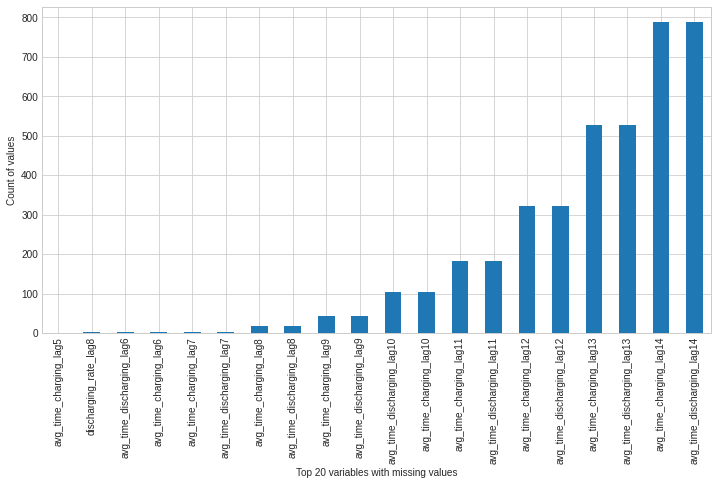

In [69]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [70]:
# Fill the missing NAs for rows now
filling(df_test)

In [71]:
# Should show no more NAs
df_test.isnull().values.sum()

0

### Part K: Predicting the 'fail_7' for test.csv

In [72]:
# Dropping the unique identifier from the train set and will be used later to recognise the categorical predictions
train = df.drop(['fail_7'], axis=1)

In [73]:
# To train on 100% of training data
train_data = train
target = y

In [74]:
train_data.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,days_since_dep
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,False,4.99,5.85,24.35,31.02,43.42,79.33,5.78,5.92,5.77,5.93,5.79,5.94,5.84,6.07,5.83,6.06,5.83,6.06,5.84,6.11,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,543
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,5.84,6.11,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,522
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,518
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,548
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,566


**Understanding paramters**

1. **Max_depth Parameter:** The max_depth parameter determines how deep each estimator is permitted to build a tree. Typically, increasing tree depth can lead to overfitting if other mitigating steps aren’t taken to prevent it. Like all algorithms, these parameters need to be view holistically. For datasets with complex structure, a deep tree might be required - other parameters like min_child_weight can be increased to mitigate chances of overfitting.

2. **Gamma Paramater:**
The gamma is an unbounded parameter from 0 to infinity that is used to control the model’s tendency to overfit. This parameter is also called min_split_loss in the reference documents. Thing of gamma as a complexity controller that prevents other loosely non-conservative parameters from fitting the trees to noise (overfitting).

3. **Learning_rate Parameter:** The learning_rate parameter controls the magnitude of change that is permitted from one tree to the next. To conceptualize this, you can think of this like learning the golf swing. If you slice the ball after your first shot at your golf lesson, it doesn’t mean you need to dramatically change the way you’re hitting the ball. Typically you want to make small, purposeful adjustments after each shot until you finally get the desired flight bath.



In [75]:
# Picking XGBoost Classifier because that was out best fit ML ago from results above
# However the results for Gradient Boosting Classifier was almost as good as XGBoost with only marginal difference.
# But, going by the rank, XGBoost Classifier returned the best accuracy of 81.38% with 10-cv.

# Randomized hyperparameter search with XGBoost
# Declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'gamma': 0.5,
    'learning_rate': 0.01,
    }    


# Instantiate the classifier 
xgb_clf = XGBClassifier(**params)

In [76]:
scoring = 'accuracy'
score = cross_val_score(xgb_clf, train_data, target, cv=10, n_jobs=-1, scoring=scoring)

In [77]:
scoreP = round(np.mean(score)*100, 2)
print('Our XGBoosting Classifier score for entire training dataset is ' + str(scoreP) + '%')

Our XGBoosting Classifier score for entire training dataset is 81.19%


In [78]:
# Predict the class for test data on whether the 4500 new devices will fail in next 7 weeks or not
xgb_clf.fit(train_data, target)

prediction = xgb_clf.predict(df_test)

In [79]:
category_pred_fail_7_xgb = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [80]:
category_pred_fail_7_xgb.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,0


In [81]:
# The result can be saved in csv with the following code:
# NOTE: If using Google Colab like here then the results will be saved locally here under '/contents'
category_pred_fail_7_xgb.to_csv('pb_challenge_prediction_xgb.csv', index=False)

## CASE II - Modeling with feature selection

### Part L: Identifying the optimal features

In [82]:
# Now Let's repeat the process with feature selection - which we have done earlier but we are putting it here again to maintain the flow

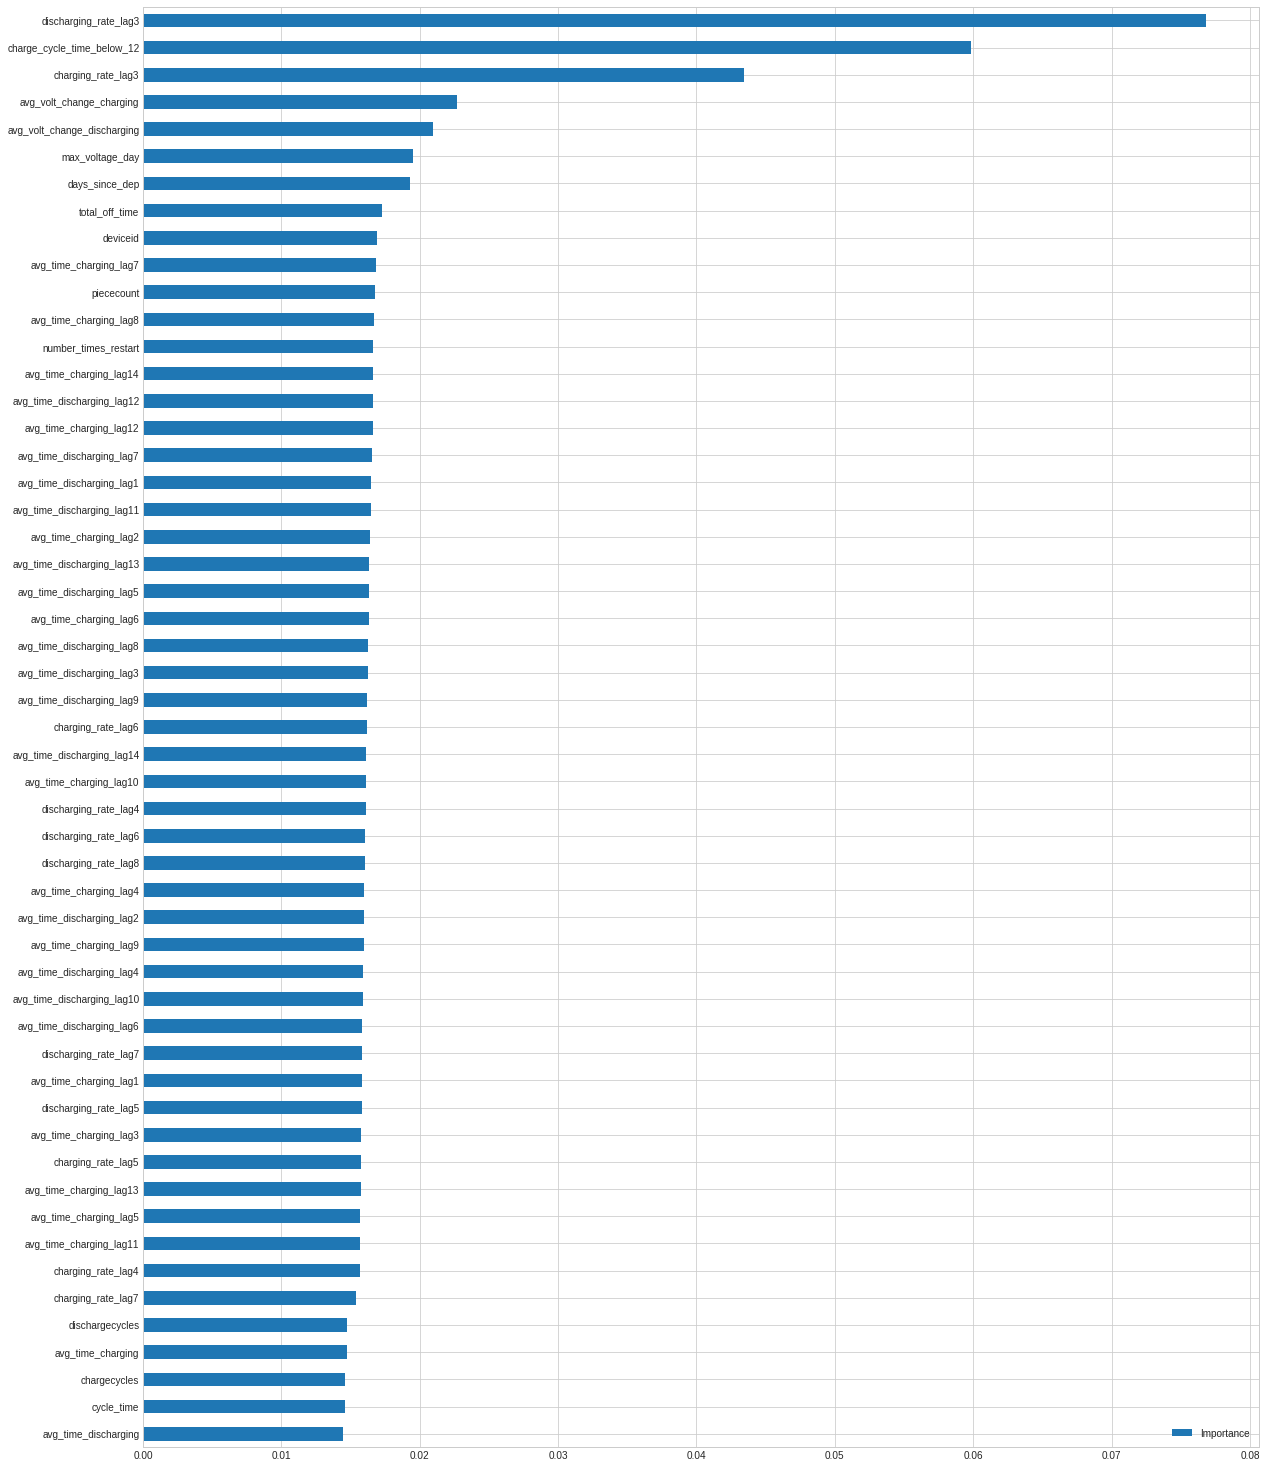

In [83]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [84]:
# The value of feature importance as seen from the graph above
importance.sort_values('Importance', ascending=False)

,Importance
discharging_rate_lag3,0.076813
charge_cycle_time_below_12,0.059847
charging_rate_lag3,0.043429
avg_volt_change_charging,0.022729
avg_volt_change_discharging,0.020926
max_voltage_day,0.019537
days_since_dep,0.019289
total_off_time,0.017249
deviceid,0.016938
avg_time_charging_lag7,0.016817


<BarContainer object of 53 artists>

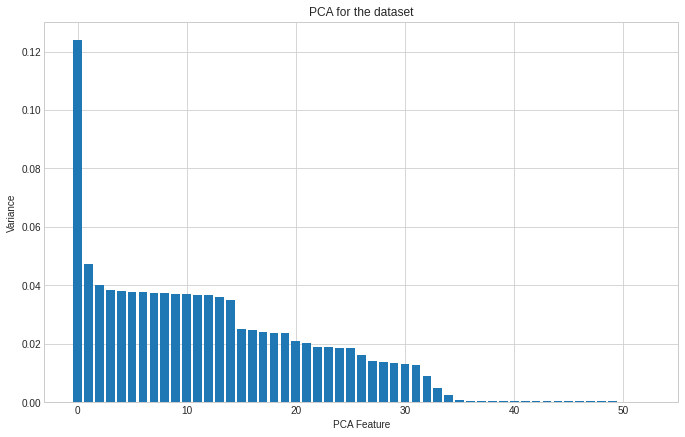

In [85]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

In [86]:
# We have run PCA to find the variables with maximum variance and found that close to 30 of the 54 features dictate most of the variation and plays a major role in classification.
# But we didn't use it. So for next steps, we will try to identify these top features and use them to run the same algos again.
# The variables are same as earlier but to distinguish I have add '_fs' suffix to highlight feature selection

In [ ]:
# We don't have any features that need label encoding, but for classification exercise it is quite common, so I am leaving the procedure for reference:
# Label Encode all labels
'''
df = df.apply(LabelEncoder().fit_transform)
df.head(5)
'''

Feature Ranking For Non-Discretised: [50 20 27  9  5 38 42 33 22 36 34  1 40  1 37 18 23 11 30 15 17 24 35 16
 31 12 29  8 25  7 19 28 10 26 41 45 48 49 46 43 47  3 13 44 32  6  4  1
  1 21 39  2 14]
Optimal number of features : 4


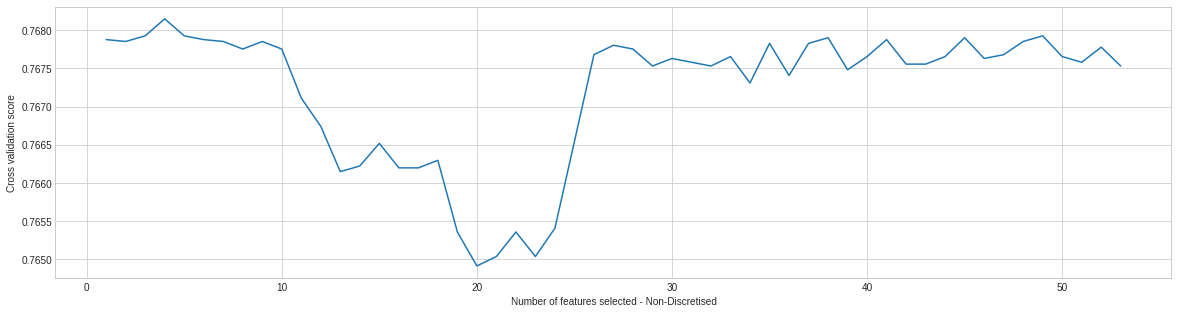

In [88]:
# Calculating RFE for non-discretised dataset, and graphing the importance for each feature

# Using RFECV method - Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
# n_jobs = -1 means using all processors
selector = RFECV(LogisticRegression(), step=1, cv=10, n_jobs=-1)

selector = selector.fit(df.drop('fail_7', axis=1).values, df['fail_7'].values)
print("Feature Ranking For Non-Discretised: %s" % selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_);

# Feature space could be subsetted and inserting the 0th index back as it is our classification feature - 'fail_7'
df_rfecv = df[df.columns[np.insert(selector.support_, 0, True)]]

## Important Note:
# Method - 1: Using Logistic regression technique, it gives us:
# 4 features with 10-cv
# 6 features with 5-cv
# Runs for 5-7 mins

Feature Ranking For Non-Discretised: [14  1 39 29  9  1 15  2 28 27 37  1 20  1 33 24 36 22 30 25 34 31 11 41
 18 32 16  8 10 12 40  1  1  1 17  3 23 38 26  6  1 35 19  1  1  1  1  5
 21  7 13  4  1]
Optimal number of features : 13


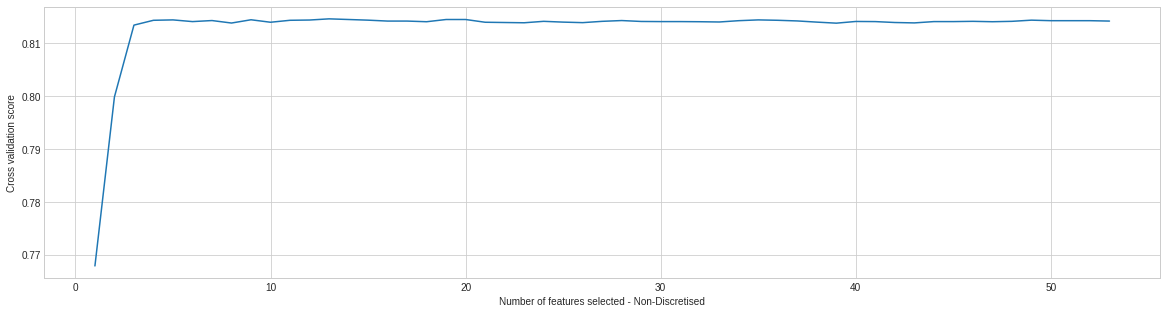

In [89]:
# Calculating RFE for non-discretised dataset, and graphing the importance for each feature

# Using RFECV method - Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
# n_jobs = -1 means using all processors
selector = RFECV(XGBClassifier(), step=1, cv=10, n_jobs=-1)

selector = selector.fit(df.drop('fail_7', axis=1).values, df['fail_7'].values)
print("Feature Ranking For Non-Discretised: %s" % selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_);

# Feature space could be subsetted and inserting the 0th index back as it is our classification feature - 'fail_7'
df_rfecv = df[df.columns[np.insert(selector.support_, 0, True)]]

## Important Note:
# Method - 1: Using XGBoost Classifier technique, it gives us:
# -- I picked this because that was the best model for us without feature selection. The results are same for normal gradient boosting too.
# 13 features with 10-cv
# 13 features with 5-cv
# Runs for 45 mins
# We choose this feature selection method as it resonates with RF feature importance earlier and the 13 features cover over 80% of the data variance as seen from PCA.

In [90]:
# Checking the name of columns in selection for the modeling
df_rfecv.columns

Index(['fail_7', 'avg_time_charging_lag1', 'charging_rate_lag3',
       'discharging_rate_lag3', 'charge_cycle_time_below_12',
       'avg_time_discharging_lag13', 'avg_time_charging_lag14',
       'avg_time_discharging_lag14', 'charging_rate_lag6', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'days_since_dep'],
      dtype='object')

### Part M: Machine Learning - Model Preparation_fs

In [91]:
# Split a dataset into train and validation sets
# NOTE: We are not calling it test set because that is separately shared for prediction
X = df_rfecv.drop ('fail_7', axis=1)
y = df_rfecv['fail_7']

# Split into train and validation sets
# We are calling it test here but that's just for nomenclature purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [92]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 13) (36450,)
(4050, 13) (4050,)


In [93]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [94]:
# Reason why we chose to have functions for all our steps earlier for:
# 1. Imputing for missing values
# 2. For calcualting accuracy, FPR, TPR, etc.
# 3. For running ML_algos for different models

### Part M: Machine Learning - Model Execution_fs

In [95]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 12.55 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.00414726490050651, 'class_weight': None, 'C': 7.801699508129567e-19}

Model with rank: 2
Mean validation score: 0.765 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.6070795108072927e-09, 'class_weight': None, 'C': 2.1068439200141824e+16}

Model with rank: 3
Mean validation score: 0.565 (std: 0.007)
Parameters: {'penalty': 'l2', 'intercept_scaling': 5232049.7773981225, 'class_weight': 'balanced', 'C': 36564219350.423416}

Model with rank: 4
Mean validation score: 0.564 (std: 0.007)
Parameters: {'penalty': 'l2', 'intercept_scaling': 10432.823020258082, 'class_weight': 'balanced', 'C': 45610612732.80982}

Model with rank: 5
Mean validation score: 0.564 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 12003500939468.098, 'class_weight': 'balanced', 'C': 149457.409931712

In [96]:
# Logistic Regression
start_time = time.time()
train_pred_log_fs, test_pred_log_fs, acc_log_fs, acc_cv_log_fs, probs_log_fs = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
log_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_log_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_log_fs)
print("Running Time: %s" % datetime.timedelta(seconds=log_time_fs))

Accuracy: 76.52
Accuracy CV 10-Fold: 76.51
Running Time: 0:00:06.218040


In [97]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_log_fs))
print(metrics.classification_report(y_test, test_pred_log_fs))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27985
           1       0.14      0.00      0.00      8465

    accuracy                           0.77     36450
   macro avg       0.45      0.50      0.44     36450
weighted avg       0.62      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      3114
           1       0.06      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.41      0.50      0.43      4050
weighted avg       0.60      0.77      0.67      4050



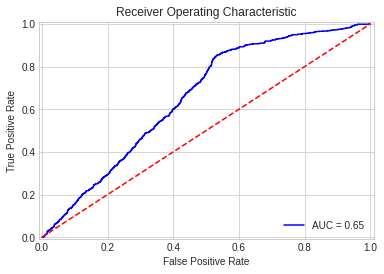

In [98]:
plot_roc_curve(y_test, probs_log_fs)

In [99]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn_fs, test_pred_knn_fs, acc_knn_fs, acc_cv_knn_fs, probs_knn_fs = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3, n_jobs = -1),
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
knn_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_knn_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn_fs)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time_fs))

Accuracy: 69.58
Accuracy CV 10-Fold: 69.81
Running Time: 0:00:05.514255


In [100]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_knn_fs))
print(metrics.classification_report(y_test, test_pred_knn_fs))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     27985
           1       0.27      0.17      0.21      8465

    accuracy                           0.70     36450
   macro avg       0.52      0.51      0.51     36450
weighted avg       0.66      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3114
           1       0.26      0.17      0.21       936

    accuracy                           0.70      4050
   macro avg       0.52      0.51      0.51      4050
weighted avg       0.65      0.70      0.67      4050



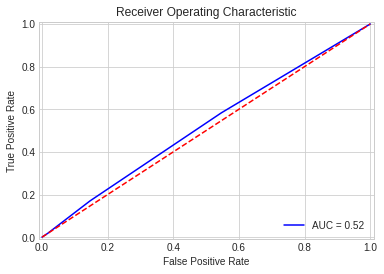

In [101]:
plot_roc_curve(y_test, probs_knn_fs)

In [102]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian_fs, test_pred_gaussian_fs, acc_gaussian_fs, acc_cv_gaussian_fs, probs_gau_fs = fit_ml_algo(GaussianNB(),
                                                                                                               X_train,
                                                                                                               y_train,
                                                                                                               X_test,
                                                                                                               10)
gaussian_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian_fs)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time_fs))

Accuracy: 60.91
Accuracy CV 10-Fold: 60.91
Running Time: 0:00:00.702366


In [103]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_gaussian_fs))
print(metrics.classification_report(y_test, test_pred_gaussian_fs))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69     27985
           1       0.35      0.77      0.48      8465

    accuracy                           0.61     36450
   macro avg       0.62      0.67      0.58     36450
weighted avg       0.76      0.61      0.64     36450

              precision    recall  f1-score   support

           0       0.89      0.56      0.69      3114
           1       0.35      0.78      0.48       936

    accuracy                           0.61      4050
   macro avg       0.62      0.67      0.58      4050
weighted avg       0.77      0.61      0.64      4050



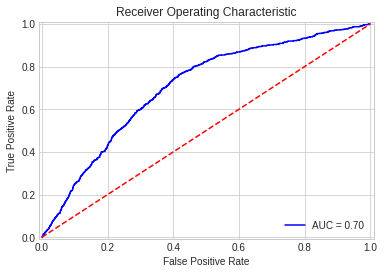

In [104]:
plot_roc_curve(y_test, probs_gau_fs)

In [105]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc_fs, test_pred_svc_fs, acc_linear_svc_fs, acc_cv_linear_svc_fs, _ = fit_ml_algo(LinearSVC(),
                                                                                              X_train,
                                                                                              y_train,
                                                                                              X_test,
                                                                                              10)
linear_svc_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc_fs)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time_fs))

Accuracy: 76.89
Accuracy CV 10-Fold: 76.76
Running Time: 0:01:12.678429


In [106]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_svc_fs))
print(metrics.classification_report(y_test, test_pred_svc_fs))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27985
           1       0.00      0.00      0.00      8465

    accuracy                           0.77     36450
   macro avg       0.38      0.50      0.43     36450
weighted avg       0.59      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



In [107]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd_fs, test_pred_sgd_fs, acc_sgd_fs, acc_cv_sgd_fs, _ = fit_ml_algo(SGDClassifier(n_jobs = -1),
                                                                                X_train, 
                                                                                y_train,
                                                                                X_test,
                                                                                10)
sgd_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd_fs)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time_fs))

Accuracy: 76.89
Accuracy CV 10-Fold: 61.23
Running Time: 0:00:15.796970


In [108]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_sgd_fs))
print(metrics.classification_report(y_test, test_pred_sgd_fs))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     27985
           1       0.26      0.37      0.31      8465

    accuracy                           0.61     36450
   macro avg       0.52      0.53      0.52     36450
weighted avg       0.66      0.61      0.63     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



In [109]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt_fs, test_pred_dt_fs, acc_dt_fs, acc_cv_dt_fs, probs_dt_fs = fit_ml_algo(DecisionTreeClassifier(),
                                                                                      X_train,
                                                                                      y_train, 
                                                                                      X_test,
                                                                                      10)
dt_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_dt_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt_fs)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time_fs))

Accuracy: 71.28
Accuracy CV 10-Fold: 71.58
Running Time: 0:00:06.350252


In [110]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_dt_fs))
print(metrics.classification_report(y_test, test_pred_dt_fs))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     27985
           1       0.39      0.42      0.41      8465

    accuracy                           0.72     36450
   macro avg       0.61      0.61      0.61     36450
weighted avg       0.72      0.72      0.72     36450

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3114
           1       0.38      0.40      0.39       936

    accuracy                           0.71      4050
   macro avg       0.60      0.60      0.60      4050
weighted avg       0.72      0.71      0.72      4050



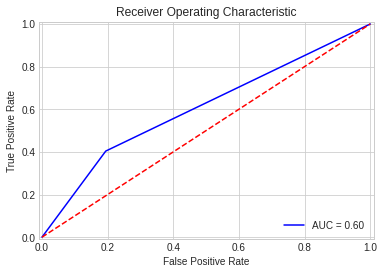

In [111]:
plot_roc_curve(y_test, probs_dt_fs)

In [112]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 80.16 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.813 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 18}

Model with rank: 2
Mean validation score: 0.812 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 11}

Model with rank: 3
Mean validation score: 0.811 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 14}

Model with rank: 4
Mean validation score: 0.803 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}

Model with rank: 5
Mean validation score: 0.800 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini',

In [113]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf_fs, test_pred_rf_fs, acc_rf_fs, acc_cv_rf_fs, probs_rf_fs = fit_ml_algo(rfc,
                                                                                      X_train, 
                                                                                      y_train,
                                                                                      X_test,
                                                                                      10)
rf_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_rf_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf_fs)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time_fs))

Accuracy: 80.44
Accuracy CV 10-Fold: 80.44
Running Time: 0:00:21.540878


In [114]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_rf_fs))
print(metrics.classification_report(y_test, test_pred_rf_fs))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     27985
           1       0.63      0.38      0.47      8465

    accuracy                           0.80     36450
   macro avg       0.73      0.65      0.68     36450
weighted avg       0.79      0.80      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3114
           1       0.63      0.37      0.47       936

    accuracy                           0.80      4050
   macro avg       0.73      0.65      0.67      4050
weighted avg       0.79      0.80      0.78      4050



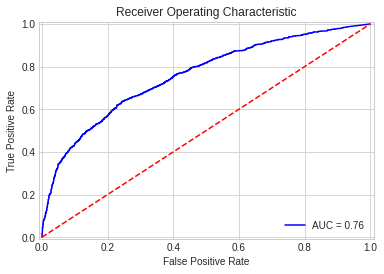

In [115]:
plot_roc_curve(y_test, probs_rf_fs)

In [116]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbc_fs, test_pred_gbc_fs, acc_gbc_fs, acc_cv_gbc_fs, probs_gbc_fs = fit_ml_algo(GradientBoostingClassifier(),
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
gbc_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_gbc_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc_fs)
print("Running Time: %s" % datetime.timedelta(seconds=gbc_time_fs))

Accuracy: 81.06
Accuracy CV 10-Fold: 81.37
Running Time: 0:01:36.890841


In [117]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_gbc_fs))
print(metrics.classification_report(y_test, test_pred_gbc_fs))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3114
           1       0.67      0.36      0.47       936

    accuracy                           0.81      4050
   macro avg       0.75      0.65      0.68      4050
weighted avg       0.79      0.81      0.79      4050



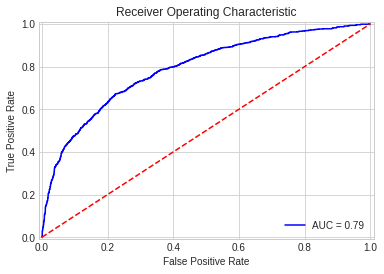

In [118]:
plot_roc_curve(y_test, probs_gbc_fs)

In [119]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb_fs, test_pred_xgb_fs, acc_xgb_fs, acc_cv_xgb_fs, probs_xgb_fs = fit_ml_algo(XGBClassifier(), 
                                                                                           X_train, 
                                                                                           y_train, 
                                                                                           X_test, 
                                                                                           10)
xgb_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb_fs)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time_fs))

Accuracy: 81.14
Accuracy CV 10-Fold: 81.4
Running Time: 0:00:23.688871


In [120]:
# Print the classification report
print(metrics.classification_report(y_train, train_pred_xgb_fs))
print(metrics.classification_report(y_test, test_pred_xgb_fs))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3114
           1       0.67      0.37      0.47       936

    accuracy                           0.81      4050
   macro avg       0.75      0.66      0.68      4050
weighted avg       0.79      0.81      0.79      4050



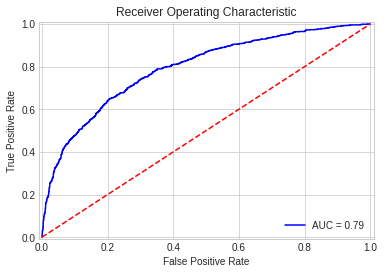

In [121]:
plot_roc_curve(y_test, probs_xgb_fs)

### Part O: Machine Learning - Model Evaluation_fs

In [122]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score': [
        acc_knn_fs, 
        acc_log_fs, 
        acc_rf_fs, 
        acc_gaussian_fs, 
        acc_sgd_fs, 
        acc_linear_svc_fs, 
        acc_dt_fs,
        acc_gbc_fs,
        acc_xgb_fs
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
8,XGBoost Classifier,81.14
7,Gradient Boosting Classifier,81.06
2,Random Forest,80.44
4,Stochastic Gradient Descent,76.89
5,Linear SVC,76.89
1,Logistic Regression,76.52
6,Decision Tree,71.28
0,KNN,69.58
3,Naive Bayes,60.91


In [123]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn_fs, 
        acc_cv_log_fs,     
        acc_cv_rf_fs, 
        acc_cv_gaussian_fs, 
        acc_cv_sgd_fs, 
        acc_cv_linear_svc_fs, 
        acc_cv_dt_fs,
        acc_cv_gbc_fs,
        acc_cv_xgb_fs
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
8,XGBoost Classifier,81.40
7,Gradient Boosting Classifier,81.37
2,Random Forest,80.44
5,Linear SVC,76.76
1,Logistic Regression,76.51
6,Decision Tree,71.58
0,KNN,69.81
4,Stochastic Gradient Descent,61.23
3,Naive Bayes,60.91


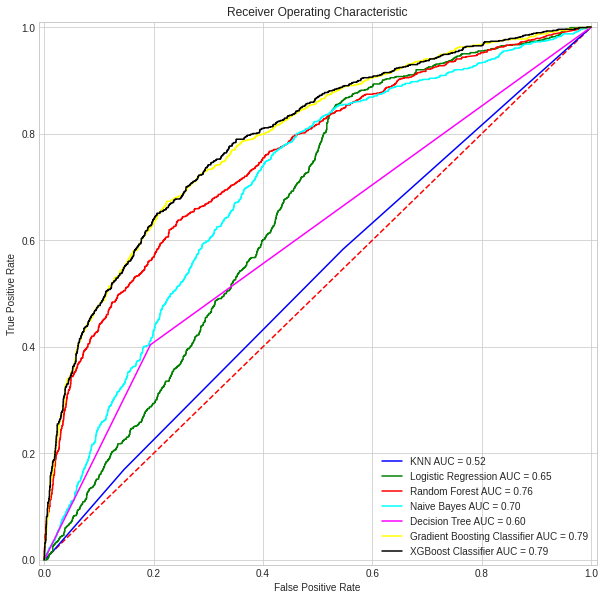

In [124]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier',
    'XGBoost Classifier'
]

probs = [
    probs_knn_fs,
    probs_log_fs,
    probs_rf_fs,
    probs_gau_fs,
    probs_dt_fs,
    probs_gbc_fs,
    probs_xgb_fs
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part P: Preparing the test set for prediction_fs

In [125]:
# We have cleaned the df_test data once before in CASE I so it won't change and can be used again here.

In [126]:
# To train on 100% of training data
train_data = df_rfecv.drop ('fail_7', axis=1)
target = df_rfecv['fail_7']

In [127]:
train_data.shape

(40500, 13)

In [138]:
train_data.head(5)

,avg_time_charging_lag1,charging_rate_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,charging_rate_lag6,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,days_since_dep
0,5.12,0.086667,-1.163333,False,6.06,5.84,6.11,-0.166667,49.000000,2.375000,377.080000,367.428750,543
1,36.60,0.136667,-0.066667,False,35.90,5.84,6.11,-1.010000,36.857143,1.000000,350.517857,350.309286,522
2,5.51,-0.460000,-2.643333,False,3.50,26.79,41.29,-0.013333,2.333333,4.095238,346.113333,343.409524,518
3,4.66,0.076667,-0.166667,False,18.62,4.97,4.16,1.340000,10.789474,0.736842,356.184211,349.844737,548
4,5.10,0.040000,0.066667,True,47.76,21.62,37.29,0.013333,14.266667,1.133333,370.904000,367.730000,566


### Part Q: Predicting the 'fail_7' for test.csv_fs

In [128]:
# Picking XGBoost Classifier because that was out best fit ML ago from results above when using feature selection
# Even though the accuracy of one-pass is slightly higher than 10-cv we will still go ahead with 10-cv

# Randomized hyperparameter search with XGBoost
# Declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'gamma': 0.5,
    'learning_rate': 0.01,
    }   


# Instantiate the classifier 
xgb_clf_fs = XGBClassifier(**params)

In [129]:
scoring = 'accuracy'
score = cross_val_score(xgb_clf_fs, train_data, target, cv=10, n_jobs=-1, scoring=scoring)

In [130]:
scoreP = round(np.mean(score)*100, 2)
print('Our XGBoosting Classifier score for entire training dataset (with feature selection) is ' + str(scoreP) + '%')

Our XGBoosting Classifier score for entire training dataset (with feature selection) is 81.19%


In [131]:
# Picking the same features from test dataset which were returned in our feature selection earlier
df_test_fs = df_test[df_test.columns[selector.support_]]

In [132]:
df_test_fs.shape

(4500, 13)

In [133]:
df_test_fs.head()

,avg_time_charging_lag1,charging_rate_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,charging_rate_lag6,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,days_since_dep
0,35.56,-0.033333,-0.240000,True,57.85,20.67,28.73,-0.006667,47.840000,3.640000,346.301200,345.379600,571
1,31.26,-0.076667,-0.670000,False,17.73,5.35,5.51,-0.233333,24.173913,2.826087,356.218261,357.305652,566
2,30.08,0.013333,0.000000,True,3.96,5.21,4.37,0.013333,10.333333,1.266667,368.532667,366.844667,539
3,33.31,0.000000,0.003333,True,3.62,4.52,4.01,0.023333,16.625000,0.937500,352.899375,352.595000,536
4,4.44,-0.200000,-4.483333,False,59.88,25.98,41.24,0.013333,1.000000,1.200000,363.912800,365.208400,530


In [134]:
# Predict the class for test data on whether the 4500 new devices will fail in next 7 weeks or not
xgb_clf_fs.fit(train_data, target)

prediction = xgb_clf_fs.predict(df_test_fs)

In [135]:
category_pred_fail_7_xgb_fs = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [136]:
category_pred_fail_7_xgb_fs.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,0


In [137]:
# The result can be saved in csv with the following code:
# NOTE: If using Google Colab like here then the results will be saved locally here under '/contents'
category_pred_fail_7_xgb_fs.to_csv('pb_challenge_prediction_xgb_fs.csv', index=False)

### Part R: Compare prediction results - All features v/s feature selection

In [140]:
# Create a copy of the original prediction with all features (CASE I)
df_comparison = category_pred_fail_7_xgb.copy()

In [142]:
# Compare it with the results from the feature selection (CASE II)
df_comparison['match'] = np.where(category_pred_fail_7_xgb['fail_7'] == category_pred_fail_7_xgb_fs['fail_7'], 'True', 'False')
df_comparison

,deviceid,fail_7,match
0,42979,1,True
1,14911,0,True
2,48386,0,True
3,18822,0,True
4,49810,0,True
...,...,...,...
4495,23329,0,True
4496,35263,0,True
4497,12544,0,True
4498,44502,1,True


In [144]:
# Howe many predictions differ?
df_comparison.match.value_counts()

True    4500
Name: match, dtype: int64

### Part S: Conclusion

We can observe from out comparison that all 4500 rows from test data came as TRUE. That means the features we selected using RFECV method with XGBoost as our classifier reduced total features from 53 to 13, which is approximately ~25% of the provided features and they are as good at predicting the results with same accuracy as when done with all features because the match for "True" cases are same as total number of rows in test data set.

To check if the results change for other conditions, we ran the RFECV with logistic regression (results shared for illustration purpose in the feature selction part) and naive bayes classifier and they give slightly different results.

When we choose the best model from our prediction with all features and use it to eliminate unwanted features we get the same results. This is also verified using the fact that both these methods when run over the entire training data set gives the same accuracy of 81.19%. so it doesn't matter how the random split is done, the XGBoost classifier is our best prediction model for this classication exercise and those 13 features in "Part L" for deducing the optimal features works best.

Therefore to sumamrize our result we can say that for every 5 devices failing in next 7 days, we can successfuly predict 4 of those instances.

For next steps, based on the accuracy we need to decide how we are going to plan our action for the future. Do we keep a team for a new installation of meters informed? Or do we send a team that heads fixing requests to check the ones which show probable chances of failures? In terms of a device failure what is the cost of delay in identify such failures and how does it affect the users? All these queries don't have clear answer from the data, but will help put a cost structure to the entire process. A prior knowledge with prediction algorithm will reduce the planning and execution cost. This is a buisness exercise we must implement to marry the machine learning output with the operational business system in place.

----